In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/MLOPS_Project/uci_malware_detection.csv')
data.head()

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.isnull().sum()


,0
Label,0
F_1,0
F_2,0
F_3,0
F_4,0
...,...
F_527,0
F_528,0
F_529,0
F_530,0


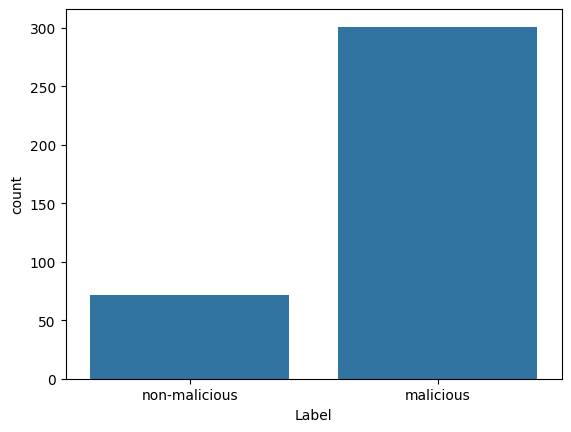

In [5]:
sns.countplot(x='Label', data=data);

In [14]:
X = data.drop(["Label"],axis=1)
y = data['Label'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

######-Model => RandomForestClassifier 
Test Accuracy :  100.00000%  
              Classification_report 
               precision    recall  f1-score   support

    malicious       1.00      1.00      1.00        61
non-malicious       1.00      1.00      1.00        14

     accuracy                           1.00        75
    macro avg       1.00      1.00      1.00        75
 weighted avg       1.00      1.00      1.00        75

             Confusion_matrix 


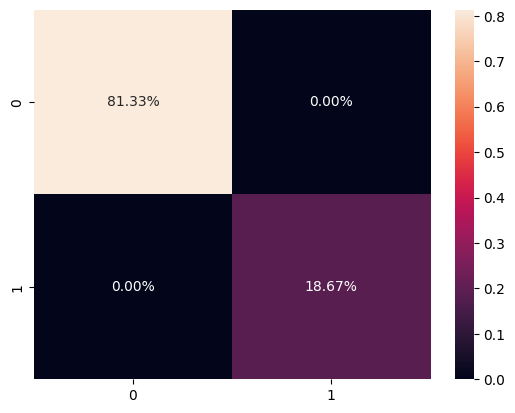

###################- End -###################
######-Model => DecisionTreeClassifier 
Test Accuracy :  98.66667%  
              Classification_report 
               precision    recall  f1-score   support

    malicious       0.98      1.00      0.99        61
non-malicious       1.00      0.93      0.96        14

     accuracy                           0.99        75
    macro avg       0.99      0.96      0.98        75
 weighted avg       0.99      0.99      0.99        75

             Confusion_matrix 


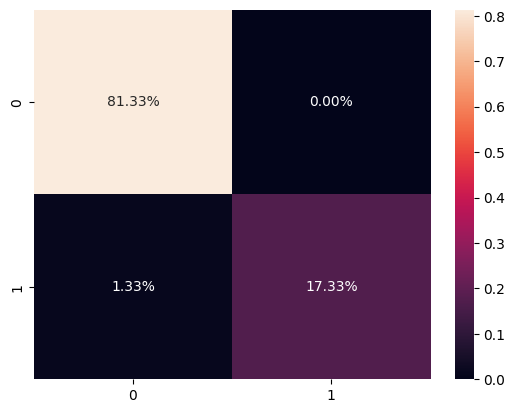

###################- End -###################
######-Model => KNeighborsClassifier 
Test Accuracy :  98.66667%  
              Classification_report 
               precision    recall  f1-score   support

    malicious       0.98      1.00      0.99        61
non-malicious       1.00      0.93      0.96        14

     accuracy                           0.99        75
    macro avg       0.99      0.96      0.98        75
 weighted avg       0.99      0.99      0.99        75

             Confusion_matrix 


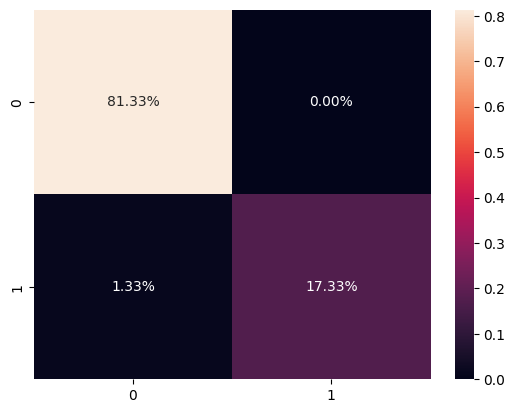

###################- End -###################
######-Model => AdaBoostClassifier 
Test Accuracy :  100.00000%  
              Classification_report 
               precision    recall  f1-score   support

    malicious       1.00      1.00      1.00        61
non-malicious       1.00      1.00      1.00        14

     accuracy                           1.00        75
    macro avg       1.00      1.00      1.00        75
 weighted avg       1.00      1.00      1.00        75

             Confusion_matrix 


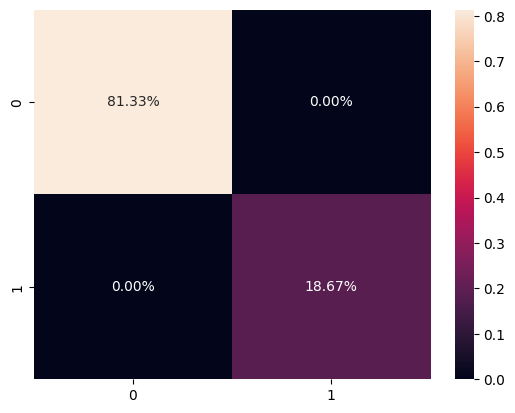

###################- End -###################
######-Model => SGDClassifier 
Test Accuracy :  100.00000%  
              Classification_report 
               precision    recall  f1-score   support

    malicious       1.00      1.00      1.00        61
non-malicious       1.00      1.00      1.00        14

     accuracy                           1.00        75
    macro avg       1.00      1.00      1.00        75
 weighted avg       1.00      1.00      1.00        75

             Confusion_matrix 


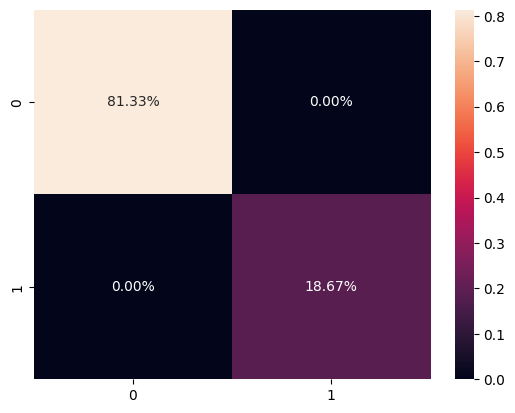

###################- End -###################
######-Model => ExtraTreesClassifier 
Test Accuracy :  100.00000%  
              Classification_report 
               precision    recall  f1-score   support

    malicious       1.00      1.00      1.00        61
non-malicious       1.00      1.00      1.00        14

     accuracy                           1.00        75
    macro avg       1.00      1.00      1.00        75
 weighted avg       1.00      1.00      1.00        75

             Confusion_matrix 


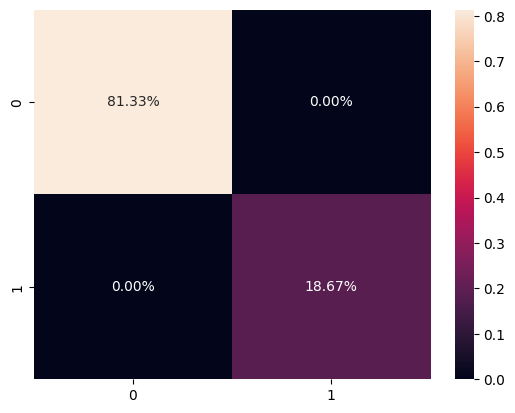

###################- End -###################
######-Model => GaussianNB 
Test Accuracy :  100.00000%  
              Classification_report 
               precision    recall  f1-score   support

    malicious       1.00      1.00      1.00        61
non-malicious       1.00      1.00      1.00        14

     accuracy                           1.00        75
    macro avg       1.00      1.00      1.00        75
 weighted avg       1.00      1.00      1.00        75

             Confusion_matrix 


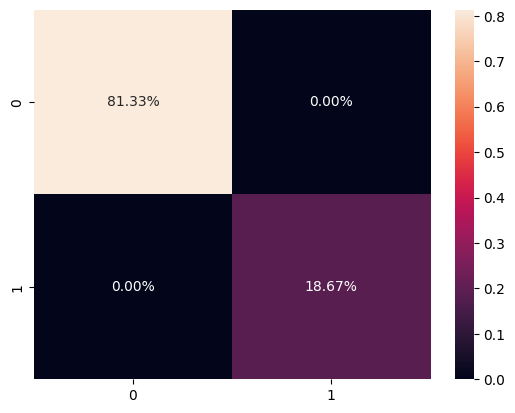

###################- End -###################


In [8]:
models = [RandomForestClassifier,DecisionTreeClassifier,KNeighborsClassifier,AdaBoostClassifier,SGDClassifier,
         ExtraTreesClassifier,GaussianNB]
accuracy_test=[]
model = []
for m in models:
    model_name = type(m()).__name__
    print('######-Model =>\033[07m {} \033[0m'.format(type(m()).__name__))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    model.append(model_name)
    print('Test Accuracy :\033[32m \033[01m {:.5f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

In [9]:
model = pd.Series(model, name='Model').astype(str)
accuracy = pd.Series(accuracy_test, name='Accuracy')
output = pd.concat([model, accuracy], axis=1)

In [10]:
output

,Model,Accuracy
0,RandomForestClassifier,1.000000
1,DecisionTreeClassifier,0.986667
2,KNeighborsClassifier,0.986667
3,AdaBoostClassifier,1.000000
4,SGDClassifier,1.000000
5,ExtraTreesClassifier,1.000000
6,GaussianNB,1.000000


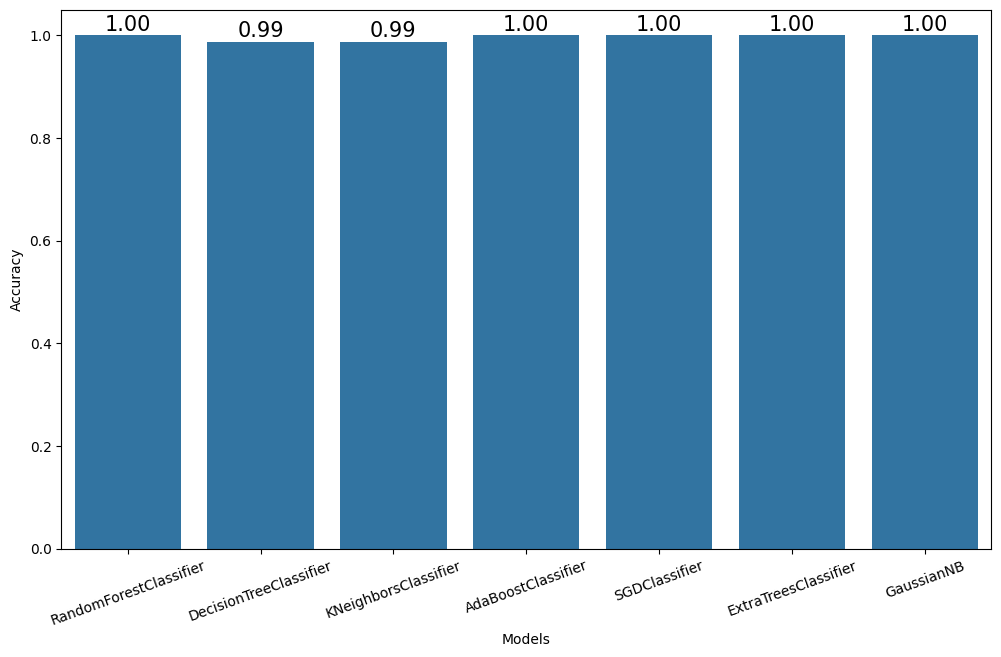

In [11]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=20);

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop(columns=['Label'])
y = data['Label']

# Split the data for training (useful for model-based feature selection)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features for consistency
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Random Forest model to rank feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importances and select the top 5 features
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
top_5_features = feature_importance_df.nlargest(5, 'Importance')['Feature'].tolist()

# Display the top 5 features
top_5_features


['F_20', 'F_66', 'F_139', 'F_51', 'F_162']

In [13]:
# Update dataset with only the top 5 features
X_reduced = X[top_5_features]
